In [1]:
import json
from pathlib import Path
import os

dataset_path = Path("C:\\data")
train_folder = dataset_path.joinpath(Path("train"))
f0_folder = train_folder.joinpath(Path("0"))
f4_folder = train_folder.joinpath(Path("1"))
test_folder = dataset_path.joinpath(Path("test"))

In [ ]:
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split

train_lower = []
train_upper = []
train_rpa = []
train_circle = []
train_target = []
train_id = []
test_lower = []
test_upper = []
test_rpa = []
test_circle = []
test_id = []

f0filenames = os.listdir(f0_folder)
f4filenames = os.listdir(f4_folder)
testfilenames = os.listdir(test_folder)
crop_horizontal = 250
crop_vertical = 10
img_size = (1050, 326)
box = (crop_horizontal, crop_vertical, img_size[0]-crop_horizontal, img_size[1]-crop_vertical)

for f0filename in f0filenames:
    pat = f0_folder.joinpath(f0filename)
    l = Image.open(pat.joinpath("lower.png"))
    u = Image.open(pat.joinpath("upper.png"))
    l = l.crop(box)
    u = u.crop(box)
    rpa = Image.open(pat.joinpath("radial_polar_area.png"))
    c = Image.open(pat.joinpath("circle.png"))
    tar = 0
    train_lower.append(np.asarray(l))
    train_upper.append(np.asarray(u))
    train_rpa.append(np.asarray(rpa))
    train_circle.append(np.asarray(c))
    train_target.append(tar)
    train_id.append(f0filename)
    
for f4filename in f4filenames:
    pat = f4_folder.joinpath(f4filename)
    l = Image.open(pat.joinpath("lower.png"))
    u = Image.open(pat.joinpath("upper.png"))
    l = l.crop(box)
    u = u.crop(box)
    rpa = Image.open(pat.joinpath("radial_polar_area.png"))
    c = Image.open(pat.joinpath("circle.png"))
    tar = 1
    train_lower.append(np.asarray(l))
    train_upper.append(np.asarray(u))
    train_rpa.append(np.asarray(rpa))
    train_circle.append(np.asarray(c))
    train_target.append(tar)
    train_id.append(f0filename)
    
for testfilename in testfilenames:
    pat = test_folder.joinpath(testfilename)
    l = Image.open(pat.joinpath("lower.png"))
    l = l.crop(box)
    rpa = Image.open(pat.joinpath("radial_polar_area.png"))
    c = Image.open(pat.joinpath("circle.png"))
    test_lower.append(np.asarray(l))
    test_rpa.append(np.asarray(rpa))
    test_circle.append(np.asarray(c))
    test_id.append(testfilename)

train_id, val_id, train_lower, val_lower, train_upper, val_upper, train_rpa, val_rpa, train_circle, val_circle, train_target, val_target = train_test_split(train_id, train_lower, train_upper, train_rpa, train_circle, train_target, test_size = 0.2)
    
dataset = {
    "train":{
        "id": train_id,
        "lower": train_lower,
        "upper": train_upper,
        "rpa": train_rpa,
        "circle": train_circle,
        "target": train_target
    },
    
    "val":{
        "id": val_id,
        "lower": val_lower,
        "upper": val_upper,
        "rpa": val_rpa,
        "circle": val_circle,
        "target": val_target
    },
    
    "test":{
        "id": test_id,
        "lower": test_lower,
        "rpa": test_rpa,
        "circle": test_circle
    }
}



In [15]:
import pickle
with open("dataset.pkl", mode="wb") as file:
    pickle.dump(dataset, file)


<IPython.core.display.Javascript object>


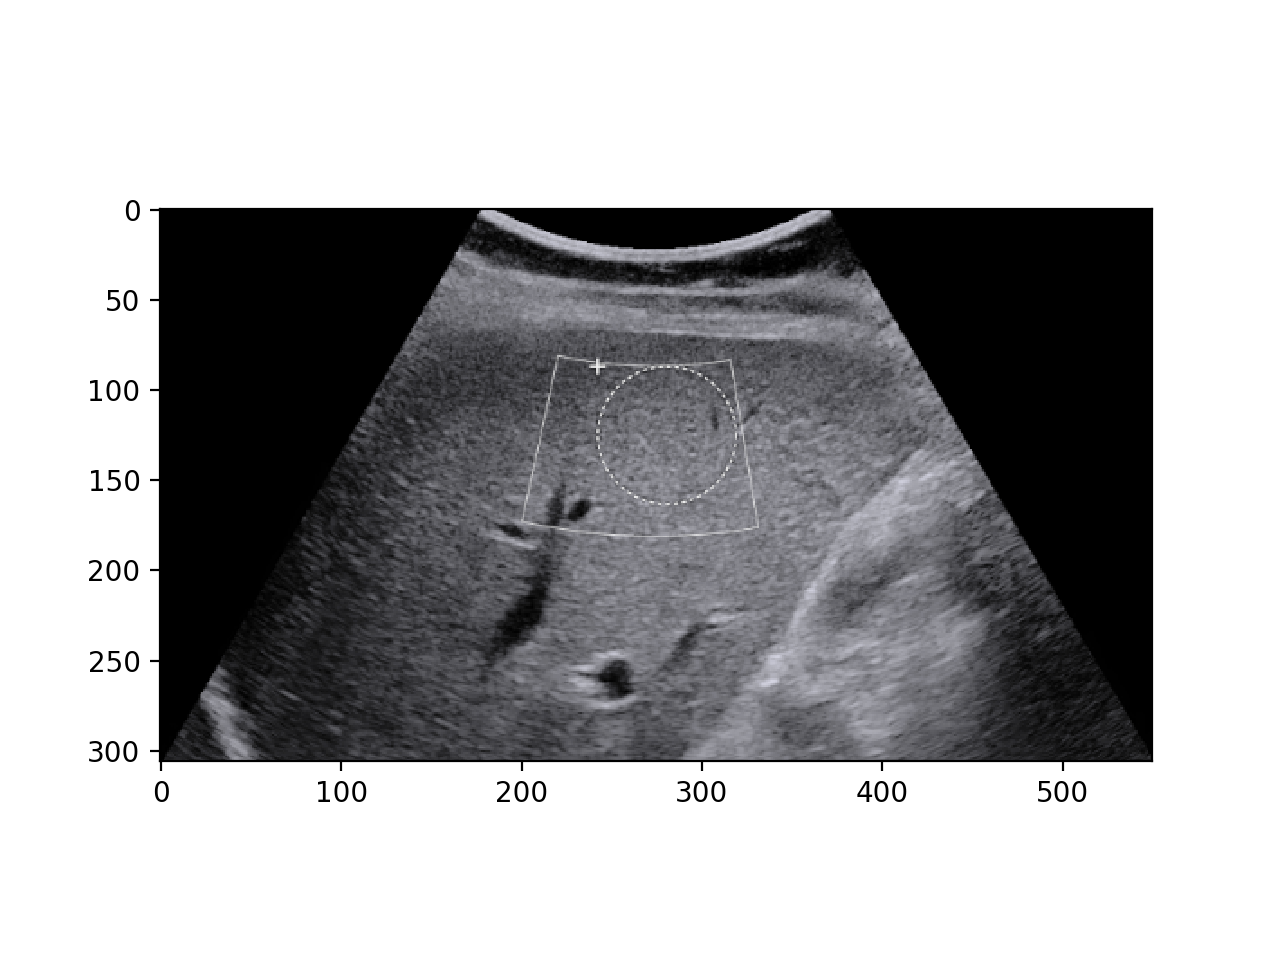

In [2]:
%matplotlib notebook
from PIL import Image
import matplotlib as mpl
import matplotlib.pyplot as plt

img = Image.open(f0_folder.joinpath("2","lower.png"))
crop_horizontal = 250
crop_vertical = 10
img_size = (1050, 326)
img = img.crop((crop_horizontal, crop_vertical, img_size[0]-crop_horizontal, img_size[1]-crop_vertical))
plt.imshow(img)


In [17]:
img.size

(550, 306)

In [1]:
import pickle
with open("dataset.pkl", mode="rb") as file:
    dataset = pickle.load(file)


dict_keys(['train', 'val', 'test'])

<IPython.core.display.Javascript object>


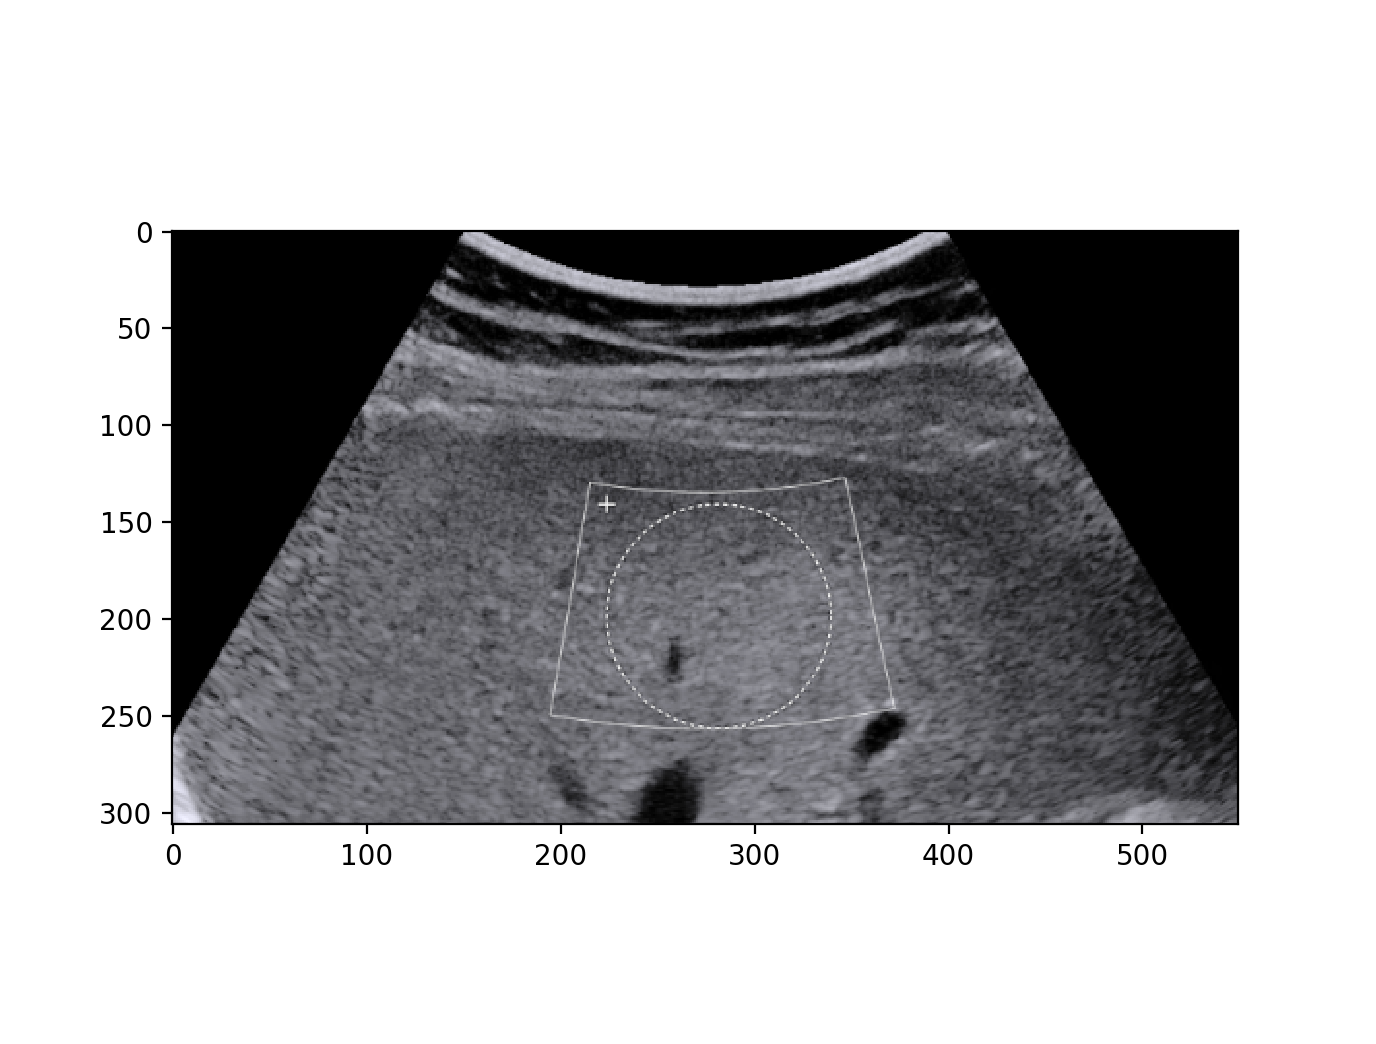

In [10]:
%matplotlib notebook
import matplotlib as mpl
import matplotlib.pyplot as plt
img = dataset['train']['lower'][0]
plt.imshow(img)

In [ ]:
with open("train_dataset.pkl", mode="wb") as file:
    pickle.dump(dataset['train'], file)
with open("validation_dataset.pkl", mode="wb") as file:
    pickle.dump(dataset['val'], file)
with open("test_dataset.pkl", mode="wb") as file:
    pickle.dump(dataset['test'], file)

In [24]:
(dataset['train']['lower'][0]/255).max()

1.0

In [30]:
for key in dataset['train']:
    dataset['train'][key] = dataset['train'][key].append(dataset['val'][key])

In [33]:
with open("train_dataset.pkl", mode="rb") as file:
    train = pickle.load(file)
with open("validation_dataset.pkl", mode="rb") as file:
    val = pickle.load(file)
    
for key in dataset['train']:
    train[key] = train[key] + val[key]
print(len(train['id']))
with open("train_dataset.pkl", mode ="wb") as file:
    pickle.dump(train, file)

2752


In [17]:
from frontend_utils import Predictor
%matplotlib notebook
from PIL import Image
import matplotlib as mpl
import matplotlib.pyplot as plt
import json
from pathlib import Path
import numpy as np
import os

dataset_path = Path("C:\\data")
train_folder = dataset_path.joinpath(Path("train"))
f0_folder = train_folder.joinpath(Path("0"))
f4_folder = train_folder.joinpath(Path("1"))
test_folder = dataset_path.joinpath(Path("test"))
img = Image.open(f0_folder.joinpath("2","lower.png"))
crop_horizontal = 250
crop_vertical = 10
img_size = (1050, 326)
img = img.crop((crop_horizontal, crop_vertical, img_size[0]-crop_horizontal, img_size[1]-crop_vertical))
img = np.rollaxis(np.array(img),2,0)
print(img.shape)
pred = Predictor()
pred.predict(img)

(3, 306, 550)


RuntimeError: Error(s) in loading state_dict for ResidualAttentionModel_56:
	Missing key(s) in state_dict: "features.0.0.weight", "features.0.1.weight", "features.0.1.bias", "features.0.1.running_mean", "features.0.1.running_var", "features.2.bn1.weight", "features.2.bn1.bias", "features.2.bn1.running_mean", "features.2.bn1.running_var", "features.2.conv1.weight", "features.2.bn2.weight", "features.2.bn2.bias", "features.2.bn2.running_mean", "features.2.bn2.running_var", "features.2.conv2.weight", "features.2.bn3.weight", "features.2.bn3.bias", "features.2.bn3.running_mean", "features.2.bn3.running_var", "features.2.conv3.weight", "features.2.conv4.weight", "features.3.first_residual_blocks.bn1.weight", "features.3.first_residual_blocks.bn1.bias", "features.3.first_residual_blocks.bn1.running_mean", "features.3.first_residual_blocks.bn1.running_var", "features.3.first_residual_blocks.conv1.weight", "features.3.first_residual_blocks.bn2.weight", "features.3.first_residual_blocks.bn2.bias", "features.3.first_residual_blocks.bn2.running_mean", "features.3.first_residual_blocks.bn2.running_var", "features.3.first_residual_blocks.conv2.weight", "features.3.first_residual_blocks.bn3.weight", "features.3.first_residual_blocks.bn3.bias", "features.3.first_residual_blocks.bn3.running_mean", "features.3.first_residual_blocks.bn3.running_var", "features.3.first_residual_blocks.conv3.weight", "features.3.first_residual_blocks.conv4.weight", "features.3.trunk_branches.0.bn1.weight", "features.3.trunk_branches.0.bn1.bias", "features.3.trunk_branches.0.bn1.running_mean", "features.3.trunk_branches.0.bn1.running_var", "features.3.trunk_branches.0.conv1.weight", "features.3.trunk_branches.0.bn2.weight", "features.3.trunk_branches.0.bn2.bias", "features.3.trunk_branches.0.bn2.running_mean", "features.3.trunk_branches.0.bn2.running_var", "features.3.trunk_branches.0.conv2.weight", "features.3.trunk_branches.0.bn3.weight", "features.3.trunk_branches.0.bn3.bias", "features.3.trunk_branches.0.bn3.running_mean", "features.3.trunk_branches.0.bn3.running_var", "features.3.trunk_branches.0.conv3.weight", "features.3.trunk_branches.0.conv4.weight", "features.3.trunk_branches.1.bn1.weight", "features.3.trunk_branches.1.bn1.bias", "features.3.trunk_branches.1.bn1.running_mean", "features.3.trunk_branches.1.bn1.running_var", "features.3.trunk_branches.1.conv1.weight", "features.3.trunk_branches.1.bn2.weight", "features.3.trunk_branches.1.bn2.bias", "features.3.trunk_branches.1.bn2.running_mean", "features.3.trunk_branches.1.bn2.running_var", "features.3.trunk_branches.1.conv2.weight", "features.3.trunk_branches.1.bn3.weight", "features.3.trunk_branches.1.bn3.bias", "features.3.trunk_branches.1.bn3.running_mean", "features.3.trunk_branches.1.bn3.running_var", "features.3.trunk_branches.1.conv3.weight", "features.3.trunk_branches.1.conv4.weight", "features.3.softmax1_blocks.bn1.weight", "features.3.softmax1_blocks.bn1.bias", "features.3.softmax1_blocks.bn1.running_mean", "features.3.softmax1_blocks.bn1.running_var", "features.3.softmax1_blocks.conv1.weight", "features.3.softmax1_blocks.bn2.weight", "features.3.softmax1_blocks.bn2.bias", "features.3.softmax1_blocks.bn2.running_mean", "features.3.softmax1_blocks.bn2.running_var", "features.3.softmax1_blocks.conv2.weight", "features.3.softmax1_blocks.bn3.weight", "features.3.softmax1_blocks.bn3.bias", "features.3.softmax1_blocks.bn3.running_mean", "features.3.softmax1_blocks.bn3.running_var", "features.3.softmax1_blocks.conv3.weight", "features.3.softmax1_blocks.conv4.weight", "features.3.skip1_connection_residual_block.bn1.weight", "features.3.skip1_connection_residual_block.bn1.bias", "features.3.skip1_connection_residual_block.bn1.running_mean", "features.3.skip1_connection_residual_block.bn1.running_var", "features.3.skip1_connection_residual_block.conv1.weight", "features.3.skip1_connection_residual_block.bn2.weight", "features.3.skip1_connection_residual_block.bn2.bias", "features.3.skip1_connection_residual_block.bn2.running_mean", "features.3.skip1_connection_residual_block.bn2.running_var", "features.3.skip1_connection_residual_block.conv2.weight", "features.3.skip1_connection_residual_block.bn3.weight", "features.3.skip1_connection_residual_block.bn3.bias", "features.3.skip1_connection_residual_block.bn3.running_mean", "features.3.skip1_connection_residual_block.bn3.running_var", "features.3.skip1_connection_residual_block.conv3.weight", "features.3.skip1_connection_residual_block.conv4.weight", "features.3.softmax2_blocks.bn1.weight", "features.3.softmax2_blocks.bn1.bias", "features.3.softmax2_blocks.bn1.running_mean", "features.3.softmax2_blocks.bn1.running_var", "features.3.softmax2_blocks.conv1.weight", "features.3.softmax2_blocks.bn2.weight", "features.3.softmax2_blocks.bn2.bias", "features.3.softmax2_blocks.bn2.running_mean", "features.3.softmax2_blocks.bn2.running_var", "features.3.softmax2_blocks.conv2.weight", "features.3.softmax2_blocks.bn3.weight", "features.3.softmax2_blocks.bn3.bias", "features.3.softmax2_blocks.bn3.running_mean", "features.3.softmax2_blocks.bn3.running_var", "features.3.softmax2_blocks.conv3.weight", "features.3.softmax2_blocks.conv4.weight", "features.3.skip2_connection_residual_block.bn1.weight", "features.3.skip2_connection_residual_block.bn1.bias", "features.3.skip2_connection_residual_block.bn1.running_mean", "features.3.skip2_connection_residual_block.bn1.running_var", "features.3.skip2_connection_residual_block.conv1.weight", "features.3.skip2_connection_residual_block.bn2.weight", "features.3.skip2_connection_residual_block.bn2.bias", "features.3.skip2_connection_residual_block.bn2.running_mean", "features.3.skip2_connection_residual_block.bn2.running_var", "features.3.skip2_connection_residual_block.conv2.weight", "features.3.skip2_connection_residual_block.bn3.weight", "features.3.skip2_connection_residual_block.bn3.bias", "features.3.skip2_connection_residual_block.bn3.running_mean", "features.3.skip2_connection_residual_block.bn3.running_var", "features.3.skip2_connection_residual_block.conv3.weight", "features.3.skip2_connection_residual_block.conv4.weight", "features.3.softmax3_blocks.0.bn1.weight", "features.3.softmax3_blocks.0.bn1.bias", "features.3.softmax3_blocks.0.bn1.running_mean", "features.3.softmax3_blocks.0.bn1.running_var", "features.3.softmax3_blocks.0.conv1.weight", "features.3.softmax3_blocks.0.bn2.weight", "features.3.softmax3_blocks.0.bn2.bias", "features.3.softmax3_blocks.0.bn2.running_mean", "features.3.softmax3_blocks.0.bn2.running_var", "features.3.softmax3_blocks.0.conv2.weight", "features.3.softmax3_blocks.0.bn3.weight", "features.3.softmax3_blocks.0.bn3.bias", "features.3.softmax3_blocks.0.bn3.running_mean", "features.3.softmax3_blocks.0.bn3.running_var", "features.3.softmax3_blocks.0.conv3.weight", "features.3.softmax3_blocks.0.conv4.weight", "features.3.softmax3_blocks.1.bn1.weight", "features.3.softmax3_blocks.1.bn1.bias", "features.3.softmax3_blocks.1.bn1.running_mean", "features.3.softmax3_blocks.1.bn1.running_var", "features.3.softmax3_blocks.1.conv1.weight", "features.3.softmax3_blocks.1.bn2.weight", "features.3.softmax3_blocks.1.bn2.bias", "features.3.softmax3_blocks.1.bn2.running_mean", "features.3.softmax3_blocks.1.bn2.running_var", "features.3.softmax3_blocks.1.conv2.weight", "features.3.softmax3_blocks.1.bn3.weight", "features.3.softmax3_blocks.1.bn3.bias", "features.3.softmax3_blocks.1.bn3.running_mean", "features.3.softmax3_blocks.1.bn3.running_var", "features.3.softmax3_blocks.1.conv3.weight", "features.3.softmax3_blocks.1.conv4.weight", "features.3.softmax4_blocks.bn1.weight", "features.3.softmax4_blocks.bn1.bias", "features.3.softmax4_blocks.bn1.running_mean", "features.3.softmax4_blocks.bn1.running_var", "features.3.softmax4_blocks.conv1.weight", "features.3.softmax4_blocks.bn2.weight", "features.3.softmax4_blocks.bn2.bias", "features.3.softmax4_blocks.bn2.running_mean", "features.3.softmax4_blocks.bn2.running_var", "features.3.softmax4_blocks.conv2.weight", "features.3.softmax4_blocks.bn3.weight", "features.3.softmax4_blocks.bn3.bias", "features.3.softmax4_blocks.bn3.running_mean", "features.3.softmax4_blocks.bn3.running_var", "features.3.softmax4_blocks.conv3.weight", "features.3.softmax4_blocks.conv4.weight", "features.3.softmax5_blocks.bn1.weight", "features.3.softmax5_blocks.bn1.bias", "features.3.softmax5_blocks.bn1.running_mean", "features.3.softmax5_blocks.bn1.running_var", "features.3.softmax5_blocks.conv1.weight", "features.3.softmax5_blocks.bn2.weight", "features.3.softmax5_blocks.bn2.bias", "features.3.softmax5_blocks.bn2.running_mean", "features.3.softmax5_blocks.bn2.running_var", "features.3.softmax5_blocks.conv2.weight", "features.3.softmax5_blocks.bn3.weight", "features.3.softmax5_blocks.bn3.bias", "features.3.softmax5_blocks.bn3.running_mean", "features.3.softmax5_blocks.bn3.running_var", "features.3.softmax5_blocks.conv3.weight", "features.3.softmax5_blocks.conv4.weight", "features.3.softmax6_blocks.0.weight", "features.3.softmax6_blocks.0.bias", "features.3.softmax6_blocks.0.running_mean", "features.3.softmax6_blocks.0.running_var", "features.3.softmax6_blocks.2.weight", "features.3.softmax6_blocks.3.weight", "features.3.softmax6_blocks.3.bias", "features.3.softmax6_blocks.3.running_mean", "features.3.softmax6_blocks.3.running_var", "features.3.softmax6_blocks.5.weight", "features.3.last_blocks.bn1.weight", "features.3.last_blocks.bn1.bias", "features.3.last_blocks.bn1.running_mean", "features.3.last_blocks.bn1.running_var", "features.3.last_blocks.conv1.weight", "features.3.last_blocks.bn2.weight", "features.3.last_blocks.bn2.bias", "features.3.last_blocks.bn2.running_mean", "features.3.last_blocks.bn2.running_var", "features.3.last_blocks.conv2.weight", "features.3.last_blocks.bn3.weight", "features.3.last_blocks.bn3.bias", "features.3.last_blocks.bn3.running_mean", "features.3.last_blocks.bn3.running_var", "features.3.last_blocks.conv3.weight", "features.3.last_blocks.conv4.weight", "features.4.bn1.weight", "features.4.bn1.bias", "features.4.bn1.running_mean", "features.4.bn1.running_var", "features.4.conv1.weight", "features.4.bn2.weight", "features.4.bn2.bias", "features.4.bn2.running_mean", "features.4.bn2.running_var", "features.4.conv2.weight", "features.4.bn3.weight", "features.4.bn3.bias", "features.4.bn3.running_mean", "features.4.bn3.running_var", "features.4.conv3.weight", "features.4.conv4.weight", "features.5.first_residual_blocks.bn1.weight", "features.5.first_residual_blocks.bn1.bias", "features.5.first_residual_blocks.bn1.running_mean", "features.5.first_residual_blocks.bn1.running_var", "features.5.first_residual_blocks.conv1.weight", "features.5.first_residual_blocks.bn2.weight", "features.5.first_residual_blocks.bn2.bias", "features.5.first_residual_blocks.bn2.running_mean", "features.5.first_residual_blocks.bn2.running_var", "features.5.first_residual_blocks.conv2.weight", "features.5.first_residual_blocks.bn3.weight", "features.5.first_residual_blocks.bn3.bias", "features.5.first_residual_blocks.bn3.running_mean", "features.5.first_residual_blocks.bn3.running_var", "features.5.first_residual_blocks.conv3.weight", "features.5.first_residual_blocks.conv4.weight", "features.5.trunk_branches.0.bn1.weight", "features.5.trunk_branches.0.bn1.bias", "features.5.trunk_branches.0.bn1.running_mean", "features.5.trunk_branches.0.bn1.running_var", "features.5.trunk_branches.0.conv1.weight", "features.5.trunk_branches.0.bn2.weight", "features.5.trunk_branches.0.bn2.bias", "features.5.trunk_branches.0.bn2.running_mean", "features.5.trunk_branches.0.bn2.running_var", "features.5.trunk_branches.0.conv2.weight", "features.5.trunk_branches.0.bn3.weight", "features.5.trunk_branches.0.bn3.bias", "features.5.trunk_branches.0.bn3.running_mean", "features.5.trunk_branches.0.bn3.running_var", "features.5.trunk_branches.0.conv3.weight", "features.5.trunk_branches.0.conv4.weight", "features.5.trunk_branches.1.bn1.weight", "features.5.trunk_branches.1.bn1.bias", "features.5.trunk_branches.1.bn1.running_mean", "features.5.trunk_branches.1.bn1.running_var", "features.5.trunk_branches.1.conv1.weight", "features.5.trunk_branches.1.bn2.weight", "features.5.trunk_branches.1.bn2.bias", "features.5.trunk_branches.1.bn2.running_mean", "features.5.trunk_branches.1.bn2.running_var", "features.5.trunk_branches.1.conv2.weight", "features.5.trunk_branches.1.bn3.weight", "features.5.trunk_branches.1.bn3.bias", "features.5.trunk_branches.1.bn3.running_mean", "features.5.trunk_branches.1.bn3.running_var", "features.5.trunk_branches.1.conv3.weight", "features.5.trunk_branches.1.conv4.weight", "features.5.softmax1_blocks.bn1.weight", "features.5.softmax1_blocks.bn1.bias", "features.5.softmax1_blocks.bn1.running_mean", "features.5.softmax1_blocks.bn1.running_var", "features.5.softmax1_blocks.conv1.weight", "features.5.softmax1_blocks.bn2.weight", "features.5.softmax1_blocks.bn2.bias", "features.5.softmax1_blocks.bn2.running_mean", "features.5.softmax1_blocks.bn2.running_var", "features.5.softmax1_blocks.conv2.weight", "features.5.softmax1_blocks.bn3.weight", "features.5.softmax1_blocks.bn3.bias", "features.5.softmax1_blocks.bn3.running_mean", "features.5.softmax1_blocks.bn3.running_var", "features.5.softmax1_blocks.conv3.weight", "features.5.softmax1_blocks.conv4.weight", "features.5.skip1_connection_residual_block.bn1.weight", "features.5.skip1_connection_residual_block.bn1.bias", "features.5.skip1_connection_residual_block.bn1.running_mean", "features.5.skip1_connection_residual_block.bn1.running_var", "features.5.skip1_connection_residual_block.conv1.weight", "features.5.skip1_connection_residual_block.bn2.weight", "features.5.skip1_connection_residual_block.bn2.bias", "features.5.skip1_connection_residual_block.bn2.running_mean", "features.5.skip1_connection_residual_block.bn2.running_var", "features.5.skip1_connection_residual_block.conv2.weight", "features.5.skip1_connection_residual_block.bn3.weight", "features.5.skip1_connection_residual_block.bn3.bias", "features.5.skip1_connection_residual_block.bn3.running_mean", "features.5.skip1_connection_residual_block.bn3.running_var", "features.5.skip1_connection_residual_block.conv3.weight", "features.5.skip1_connection_residual_block.conv4.weight", "features.5.softmax2_blocks.0.bn1.weight", "features.5.softmax2_blocks.0.bn1.bias", "features.5.softmax2_blocks.0.bn1.running_mean", "features.5.softmax2_blocks.0.bn1.running_var", "features.5.softmax2_blocks.0.conv1.weight", "features.5.softmax2_blocks.0.bn2.weight", "features.5.softmax2_blocks.0.bn2.bias", "features.5.softmax2_blocks.0.bn2.running_mean", "features.5.softmax2_blocks.0.bn2.running_var", "features.5.softmax2_blocks.0.conv2.weight", "features.5.softmax2_blocks.0.bn3.weight", "features.5.softmax2_blocks.0.bn3.bias", "features.5.softmax2_blocks.0.bn3.running_mean", "features.5.softmax2_blocks.0.bn3.running_var", "features.5.softmax2_blocks.0.conv3.weight", "features.5.softmax2_blocks.0.conv4.weight", "features.5.softmax2_blocks.1.bn1.weight", "features.5.softmax2_blocks.1.bn1.bias", "features.5.softmax2_blocks.1.bn1.running_mean", "features.5.softmax2_blocks.1.bn1.running_var", "features.5.softmax2_blocks.1.conv1.weight", "features.5.softmax2_blocks.1.bn2.weight", "features.5.softmax2_blocks.1.bn2.bias", "features.5.softmax2_blocks.1.bn2.running_mean", "features.5.softmax2_blocks.1.bn2.running_var", "features.5.softmax2_blocks.1.conv2.weight", "features.5.softmax2_blocks.1.bn3.weight", "features.5.softmax2_blocks.1.bn3.bias", "features.5.softmax2_blocks.1.bn3.running_mean", "features.5.softmax2_blocks.1.bn3.running_var", "features.5.softmax2_blocks.1.conv3.weight", "features.5.softmax2_blocks.1.conv4.weight", "features.5.softmax3_blocks.bn1.weight", "features.5.softmax3_blocks.bn1.bias", "features.5.softmax3_blocks.bn1.running_mean", "features.5.softmax3_blocks.bn1.running_var", "features.5.softmax3_blocks.conv1.weight", "features.5.softmax3_blocks.bn2.weight", "features.5.softmax3_blocks.bn2.bias", "features.5.softmax3_blocks.bn2.running_mean", "features.5.softmax3_blocks.bn2.running_var", "features.5.softmax3_blocks.conv2.weight", "features.5.softmax3_blocks.bn3.weight", "features.5.softmax3_blocks.bn3.bias", "features.5.softmax3_blocks.bn3.running_mean", "features.5.softmax3_blocks.bn3.running_var", "features.5.softmax3_blocks.conv3.weight", "features.5.softmax3_blocks.conv4.weight", "features.5.softmax4_blocks.0.weight", "features.5.softmax4_blocks.0.bias", "features.5.softmax4_blocks.0.running_mean", "features.5.softmax4_blocks.0.running_var", "features.5.softmax4_blocks.2.weight", "features.5.softmax4_blocks.3.weight", "features.5.softmax4_blocks.3.bias", "features.5.softmax4_blocks.3.running_mean", "features.5.softmax4_blocks.3.running_var", "features.5.softmax4_blocks.5.weight", "features.5.last_blocks.bn1.weight", "features.5.last_blocks.bn1.bias", "features.5.last_blocks.bn1.running_mean", "features.5.last_blocks.bn1.running_var", "features.5.last_blocks.conv1.weight", "features.5.last_blocks.bn2.weight", "features.5.last_blocks.bn2.bias", "features.5.last_blocks.bn2.running_mean", "features.5.last_blocks.bn2.running_var", "features.5.last_blocks.conv2.weight", "features.5.last_blocks.bn3.weight", "features.5.last_blocks.bn3.bias", "features.5.last_blocks.bn3.running_mean", "features.5.last_blocks.bn3.running_var", "features.5.last_blocks.conv3.weight", "features.5.last_blocks.conv4.weight", "features.6.bn1.weight", "features.6.bn1.bias", "features.6.bn1.running_mean", "features.6.bn1.running_var", "features.6.conv1.weight", "features.6.bn2.weight", "features.6.bn2.bias", "features.6.bn2.running_mean", "features.6.bn2.running_var", "features.6.conv2.weight", "features.6.bn3.weight", "features.6.bn3.bias", "features.6.bn3.running_mean", "features.6.bn3.running_var", "features.6.conv3.weight", "features.6.conv4.weight", "features.7.first_residual_blocks.bn1.weight", "features.7.first_residual_blocks.bn1.bias", "features.7.first_residual_blocks.bn1.running_mean", "features.7.first_residual_blocks.bn1.running_var", "features.7.first_residual_blocks.conv1.weight", "features.7.first_residual_blocks.bn2.weight", "features.7.first_residual_blocks.bn2.bias", "features.7.first_residual_blocks.bn2.running_mean", "features.7.first_residual_blocks.bn2.running_var", "features.7.first_residual_blocks.conv2.weight", "features.7.first_residual_blocks.bn3.weight", "features.7.first_residual_blocks.bn3.bias", "features.7.first_residual_blocks.bn3.running_mean", "features.7.first_residual_blocks.bn3.running_var", "features.7.first_residual_blocks.conv3.weight", "features.7.first_residual_blocks.conv4.weight", "features.7.trunk_branches.0.bn1.weight", "features.7.trunk_branches.0.bn1.bias", "features.7.trunk_branches.0.bn1.running_mean", "features.7.trunk_branches.0.bn1.running_var", "features.7.trunk_branches.0.conv1.weight", "features.7.trunk_branches.0.bn2.weight", "features.7.trunk_branches.0.bn2.bias", "features.7.trunk_branches.0.bn2.running_mean", "features.7.trunk_branches.0.bn2.running_var", "features.7.trunk_branches.0.conv2.weight", "features.7.trunk_branches.0.bn3.weight", "features.7.trunk_branches.0.bn3.bias", "features.7.trunk_branches.0.bn3.running_mean", "features.7.trunk_branches.0.bn3.running_var", "features.7.trunk_branches.0.conv3.weight", "features.7.trunk_branches.0.conv4.weight", "features.7.trunk_branches.1.bn1.weight", "features.7.trunk_branches.1.bn1.bias", "features.7.trunk_branches.1.bn1.running_mean", "features.7.trunk_branches.1.bn1.running_var", "features.7.trunk_branches.1.conv1.weight", "features.7.trunk_branches.1.bn2.weight", "features.7.trunk_branches.1.bn2.bias", "features.7.trunk_branches.1.bn2.running_mean", "features.7.trunk_branches.1.bn2.running_var", "features.7.trunk_branches.1.conv2.weight", "features.7.trunk_branches.1.bn3.weight", "features.7.trunk_branches.1.bn3.bias", "features.7.trunk_branches.1.bn3.running_mean", "features.7.trunk_branches.1.bn3.running_var", "features.7.trunk_branches.1.conv3.weight", "features.7.trunk_branches.1.conv4.weight", "features.7.softmax1_blocks.0.bn1.weight", "features.7.softmax1_blocks.0.bn1.bias", "features.7.softmax1_blocks.0.bn1.running_mean", "features.7.softmax1_blocks.0.bn1.running_var", "features.7.softmax1_blocks.0.conv1.weight", "features.7.softmax1_blocks.0.bn2.weight", "features.7.softmax1_blocks.0.bn2.bias", "features.7.softmax1_blocks.0.bn2.running_mean", "features.7.softmax1_blocks.0.bn2.running_var", "features.7.softmax1_blocks.0.conv2.weight", "features.7.softmax1_blocks.0.bn3.weight", "features.7.softmax1_blocks.0.bn3.bias", "features.7.softmax1_blocks.0.bn3.running_mean", "features.7.softmax1_blocks.0.bn3.running_var", "features.7.softmax1_blocks.0.conv3.weight", "features.7.softmax1_blocks.0.conv4.weight", "features.7.softmax1_blocks.1.bn1.weight", "features.7.softmax1_blocks.1.bn1.bias", "features.7.softmax1_blocks.1.bn1.running_mean", "features.7.softmax1_blocks.1.bn1.running_var", "features.7.softmax1_blocks.1.conv1.weight", "features.7.softmax1_blocks.1.bn2.weight", "features.7.softmax1_blocks.1.bn2.bias", "features.7.softmax1_blocks.1.bn2.running_mean", "features.7.softmax1_blocks.1.bn2.running_var", "features.7.softmax1_blocks.1.conv2.weight", "features.7.softmax1_blocks.1.bn3.weight", "features.7.softmax1_blocks.1.bn3.bias", "features.7.softmax1_blocks.1.bn3.running_mean", "features.7.softmax1_blocks.1.bn3.running_var", "features.7.softmax1_blocks.1.conv3.weight", "features.7.softmax1_blocks.1.conv4.weight", "features.7.softmax2_blocks.0.weight", "features.7.softmax2_blocks.0.bias", "features.7.softmax2_blocks.0.running_mean", "features.7.softmax2_blocks.0.running_var", "features.7.softmax2_blocks.2.weight", "features.7.softmax2_blocks.3.weight", "features.7.softmax2_blocks.3.bias", "features.7.softmax2_blocks.3.running_mean", "features.7.softmax2_blocks.3.running_var", "features.7.softmax2_blocks.5.weight", "features.7.last_blocks.bn1.weight", "features.7.last_blocks.bn1.bias", "features.7.last_blocks.bn1.running_mean", "features.7.last_blocks.bn1.running_var", "features.7.last_blocks.conv1.weight", "features.7.last_blocks.bn2.weight", "features.7.last_blocks.bn2.bias", "features.7.last_blocks.bn2.running_mean", "features.7.last_blocks.bn2.running_var", "features.7.last_blocks.conv2.weight", "features.7.last_blocks.bn3.weight", "features.7.last_blocks.bn3.bias", "features.7.last_blocks.bn3.running_mean", "features.7.last_blocks.bn3.running_var", "features.7.last_blocks.conv3.weight", "features.7.last_blocks.conv4.weight", "features.8.bn1.weight", "features.8.bn1.bias", "features.8.bn1.running_mean", "features.8.bn1.running_var", "features.8.conv1.weight", "features.8.bn2.weight", "features.8.bn2.bias", "features.8.bn2.running_mean", "features.8.bn2.running_var", "features.8.conv2.weight", "features.8.bn3.weight", "features.8.bn3.bias", "features.8.bn3.running_mean", "features.8.bn3.running_var", "features.8.conv3.weight", "features.8.conv4.weight", "features.9.bn1.weight", "features.9.bn1.bias", "features.9.bn1.running_mean", "features.9.bn1.running_var", "features.9.conv1.weight", "features.9.bn2.weight", "features.9.bn2.bias", "features.9.bn2.running_mean", "features.9.bn2.running_var", "features.9.conv2.weight", "features.9.bn3.weight", "features.9.bn3.bias", "features.9.bn3.running_mean", "features.9.bn3.running_var", "features.9.conv3.weight", "features.9.conv4.weight", "features.10.bn1.weight", "features.10.bn1.bias", "features.10.bn1.running_mean", "features.10.bn1.running_var", "features.10.conv1.weight", "features.10.bn2.weight", "features.10.bn2.bias", "features.10.bn2.running_mean", "features.10.bn2.running_var", "features.10.conv2.weight", "features.10.bn3.weight", "features.10.bn3.bias", "features.10.bn3.running_mean", "features.10.bn3.running_var", "features.10.conv3.weight", "features.10.conv4.weight". 

In [2]:
import torch
dc = torch.load("./Res_56.pth", map_location=torch.device('cpu'))

In [5]:
dc.keys()

odict_keys(['conv1.0.weight', 'conv1.1.weight', 'conv1.1.bias', 'conv1.1.running_mean', 'conv1.1.running_var', 'conv1.1.num_batches_tracked', 'residual_block1.bn1.weight', 'residual_block1.bn1.bias', 'residual_block1.bn1.running_mean', 'residual_block1.bn1.running_var', 'residual_block1.bn1.num_batches_tracked', 'residual_block1.conv1.weight', 'residual_block1.bn2.weight', 'residual_block1.bn2.bias', 'residual_block1.bn2.running_mean', 'residual_block1.bn2.running_var', 'residual_block1.bn2.num_batches_tracked', 'residual_block1.conv2.weight', 'residual_block1.bn3.weight', 'residual_block1.bn3.bias', 'residual_block1.bn3.running_mean', 'residual_block1.bn3.running_var', 'residual_block1.bn3.num_batches_tracked', 'residual_block1.conv3.weight', 'residual_block1.conv4.weight', 'attention_module1.first_residual_blocks.bn1.weight', 'attention_module1.first_residual_blocks.bn1.bias', 'attention_module1.first_residual_blocks.bn1.running_mean', 'attention_module1.first_residual_blocks.bn1.run

In [ ]:
def change_key(self, old, new):
    for _ in range(len(self)):
        k, v = self.popitem(False)
        self[new if old == k else k] = v

        
keys = [key for key in dc.keys() if 'conv1' in key]
for key in keys:
    change_key(dc, key, key.replace("conv1", "features.0") )